In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import networkx as nx

import scipy.sparse.linalg
from scipy.spatial.distance import pdist, squareform

import csv
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)

## 1. Importing all the datasets

### Tracks

In [2]:
tracks = pd.read_csv("data/fma_metadata/tracks.csv", header=[0,1], index_col=0)
tracks.index.rename("track_id", inplace=True)
tracks

album                                                            \
         comments         date_created        date_released        engineer   
track_id                                                                      
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00             NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
26              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
30              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
46              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
48              0  2008-11-26 01:45:05  2009-01-06 00:00:00             NaN   
134             0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
135             1  2008-11-26 01:49:19  2009-01-07 00:00:00             NaN   
136             1  2008-11-26 01:49:19  2009-01-07 00:00:00             NaN   
137             1  2008-11-26 01:49:35  2006-12-01 00:00:00             NaN   
138             1  2008-11-26 01:49:35  2006-12-01 00:00:00             NaN   
139             0  2008-11-26 01:49:57  2009-01-16 00:00:00             NaN   
140             1  2008-11-26 01:49:59  2007-05-22 00:00:00             NaN   
141             0  2008-11-26 01:49:57  2009-01-16 00:00:00             NaN   
142             0  2008-11-26 01:50:03  2005-01-25 00:00:00             NaN   
144             0  2008-11-26 01:50:07  2009-01-06 00:00:00             NaN   
145             0  2008-11-26 01:50:07  2009-01-06 00:00:00             NaN   
146             0  2008-11-26 01:50:13  1995-01-01 00:00:00             NaN   
147             0  2008-11-26 01:50:13  1995-01-01 00:00:00             NaN   
148             0  2008-11-26 01:50:19  2009-01-15 00:00:00             NaN   
149             0  2008-11-26 01:50:25  2009-01-09 00:00:00             NaN   
150             0  2008-11-26 01:50:25  2009-01-09 00:00:00             NaN   
151             0  2008-11-26 01:50:46  2009-01-06 00:00:00             NaN   
152             0  2008-11-26 01:50:46  2009-01-06 00:00:00             NaN   
153             0  2008-11-26 01:50:50  2005-06-07 00:00:00             NaN   
154             0  2008-11-26 01:50:50  2005-06-07 00:00:00             NaN   
155             0  2008-11-26 01:51:00  2009-01-06 00:00:00             NaN   
...           ...                  ...                  ...             ...   
155290          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155291          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155292          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155293          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155294          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155295          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155296          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155297          0  2017-03-30 09:50:32  2017-03-30 00:00:00             NaN   
155298          0  2017-03-30 10:45:13                  NaN             NaN   
155299          0  2017-03-30 10:45:13                  NaN             NaN   
155300          0  2017-03-30 10:45:13                  NaN             NaN   
155301          0  2017-03-30 10:45:13                  NaN             NaN   
155302          0  2017-03-30 10:45:13                  NaN             NaN   
155303          0  2017-03-30 10:45:13                  NaN             NaN   
155304          0  2017-03-30 10:45:13                  NaN             NaN   
155305          0  2017-03-30 10:45:13                  NaN             NaN   
155306          0  2017-03-30 10:45:13                  NaN   

### Genres

In [4]:
genres = pd.read_csv("data/fma_metadata/genres.csv", index_col=0)
genres

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
6,914,38,Novelty,38
7,217,20,Comedy,20
8,868,0,Old-Time / Historic,8
9,1987,0,Country,9


In [48]:
genres.sort_values('#tracks', ascending=False)

,genre_id,#tracks,parent,title,top_level
31,38,38154,0,Experimental,38
14,15,34413,0,Electronic,15
11,12,32923,0,Rock,12
162,1235,14938,0,Instrumental,1235
9,10,13845,0,Pop,10
16,17,12706,0,Folk,17
22,25,9261,12,Punk,12
0,1,8693,38,Avant-Garde,38
20,21,8389,0,Hip-Hop,21
27,32,7268,38,Noise,38


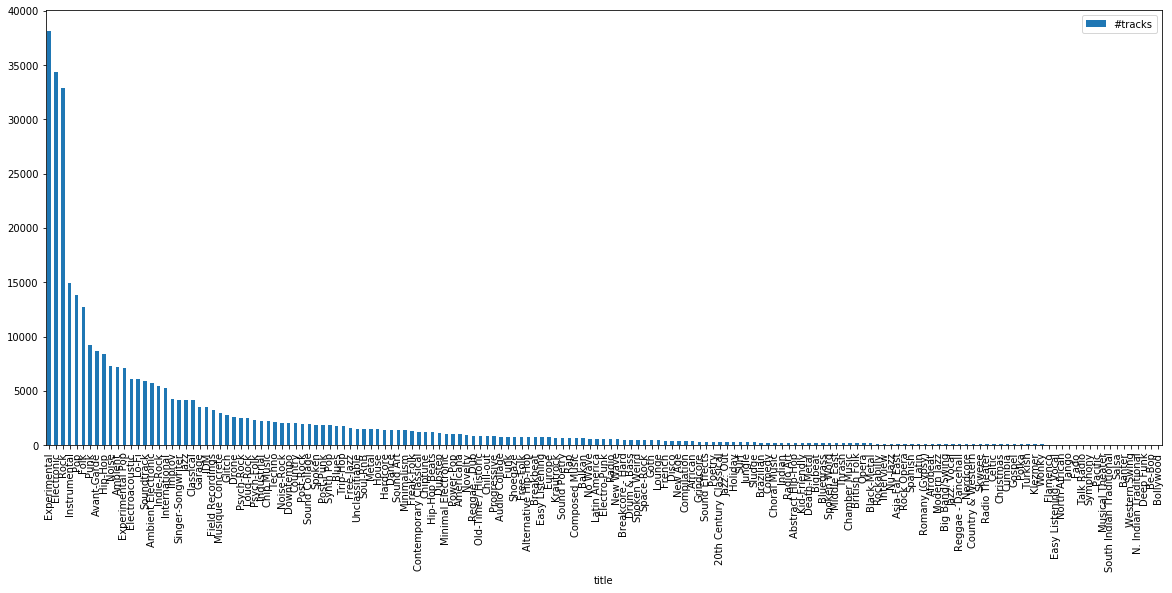

In [47]:
genres.sort_values('#tracks', ascending=False)[['#tracks', 'title']].set_index('title').plot(kind='bar', figsize=(20,8))
plt.show()

### MFCC Features

In [7]:
audio_features = pd.read_csv("data/fma_metadata/features.csv", header=[0,1,2], index_col=0)
audio_features.index.rename("track_id", inplace=True)
audio_features

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   
26           -0.699535 -0.684158  0.048825  0.042659 -0.818967 -0.917123   
30           -0.721487 -0.848560  0.890904  0.088620 -0.445513 -1.271170   
46           -0.119708 -0.858814  2.362546  0.106584 -1.315912 -1.220354   
48           -1.054053  0.932339  0.528064 -1.035338 -1.000682 -1.119304   
134           0.918445  0.674147  0.577818  1.281117  0.933746  0.078177   
135           0.978402  0.623572  1.129261 -1.043970 -1.127288 -0.032642   
136           0.915001 -0.643476 -0.460507 -0.530701 -0.364460 -0.226860   
137           1.607191  1.199649  0.745765  1.430835 -0.155455  0.768487   
138           1.501403  0.957514  1.276685  0.640389  0.442936  0.845533   
139          -0.020869  0.432330  0.331278  0.829845  2.625593  2.005660   
140           0.533579 -0.623885 -1.086205 -1.081079 -0.765151 -0.072282   
141           0.172898 -0.284804 -1.169662 -1.062855 -0.706868 -0.708281   
142          -0.581270  3.199484  1.298346 -0.681253 -0.935093 -0.960304   
144           0.121207 -0.025308  0.541327  0.967687  1.082456  1.675841   
145           0.954054  0.315324  0.015383 -0.023933  0.086671  1.279086   
146          -0.763713 -0.342105 -0.273965  0.729047 -0.649717  0.109572   
147           0.011158  0.069270  1.552282 -0.251362  0.158631  0.071886   
148          -0.453950 -0.922267 -0.845767 -1.059609 -0.164252 -0.428238   
149          -0.386733 -0.545598 -0.638649 -0.669786 -0.522530 -0.809405   
150          -0.083043  0.142131 -0.466703  1.447829 -0.324532  0.098253   
151           2.679700  1.564581  1.628766  1.574172  2.461945  4.033635   
152          -0.510457  1.649074  0.340847  0.389235 -0.371745  1.578730   
153           2.437779  0.886211  2.899974  1.726185  1.248919  0.676350   
154          40.440720 -0.251259  0.685472 -0.670811 -1.223815  1.275721   
155           0.161195  1.580878 -0.200231  0.216993  0.196968 -0.442953   
...                ...       ...       ...       ...       ...       ...   
155290       -1.256915 -1.194825 -1.353125 -0.532530 -1.404040 -0.995579   
155291       -1.543836 -1.320838 -1.199663 -0.006909 -1.160004 -0.326463   
155292       -0.955190 -0.879837  0.480942  2.266221 -0.899861 -0.904715   
155293        0.116289 -0.728864 -0.404994  0.000208 -0.377840 -0.198419   
155294       -1.052930 -0.875463  0.108331 -1.031980 -1.257848 -1.403183   
155295       -1.855166 -1.843082  6.121086  4.632593  5.402946  8.081429   
155296       -1.181767 -0.953902 -0.767223 -0.960635 -1.507767 -0.655886   
155297       -0.007668  0.104604 -0.511487  0.857308  0.266202 -0.355186   
155298       -0.956019 -0.961210 -0.447053 -0.689531 -0.633071 -0.430116   
155299       -0.378812 -0.692087 -0.869693 -0.862368  0.000357  0.103398   
155300       -0.590855 -0.228609 -0.592955 -0.585120 -0.613510  1.489933   
155301       -0.749575 -0.742979 -0.218289  0.134936  0.882519  0.471344   
155302       -0.732580 -0.203825 -0.883129 -0.393307 -0.742957 -0.767015   
155303       -0.846720 -1.161092 -0.724193 -0.604951 -1.066579 -1.133118   
155304       -0.420769 -0.099274 -0.251443  0.932526  0.313478  0.347822   
155305       -0.832872 -0.809870 -0.601314 -0.343021 -0.922507 -0.550964   
155306        0.644815 -0.879404 -1.149232 -0.655986 -0.848881 -0.672240   
155307       -0.446937  1.235004 -0.250855 -0.61

### Echonest

In [5]:
echonest = pd.read_csv("data/fma_metadata/echonest.csv", header=[0,1], skiprows=[0], index_col=0)
echonest.index.rename("track_id", inplace=True)
echonest

audio_features                                                    \
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476     1.062807e-02  0.177647   
3              0.374408     0.528643  0.817461     1.851103e-03  0.105880   
5              0.043567     0.745566  0.701470     6.967990e-04  0.373143   
10             0.951670     0.658179  0.924525     9.654270e-01  0.115474   
134            0.452217     0.513238  0.560410     1.944269e-02  0.096567   
139            0.106550     0.260911  0.607067     8.350870e-01  0.223676   
140            0.376312     0.734079  0.265685     6.695811e-01  0.085995   
141            0.963657     0.435933  0.075632     3.454935e-01  0.105686   
142            0.662881     0.379065  0.823856     9.102662e-01  0.088705   
144            0.909011     0.443643  0.641997     9.240917e-01  0.267669   
145            0.235506     0.438672  0.487752     7.161218e-01  0.070359   
146            0.532019     0.417681  0.476422     4.025004e-01  0.172105   
147            0.778410     0.706681  0.866116     8.067026e-01  0.104650   
153            0.988306     0.255661  0.979774     9.730057e-01  0.121342   
154            0.970135     0.352946  0.023852     9.571129e-01  0.113261   
155            0.981657     0.142249  0.912122     9.672940e-01  0.363510   
169            0.989141     0.225978  0.722835     2.630763e-01  0.092371   
170            0.886660     0.298518  0.744333     9.209505e-01  0.139587   
171            0.698278     0.285816  0.213494     9.556913e-01  0.087036   
172            0.815549     0.144125  0.892721     9.004301e-01  0.104703   
173            0.842113     0.285293  0.564689     9.516243e-01  0.110481   
174            0.367393     0.339698  0.846639     9.091862e-01  0.198944   
175            0.993928     0.310090  0.952493     2.743115e-01  0.354231   
176            0.833516     0.206509  0.779140     9.408411e-01  0.372311   
177            0.754275     0.209113  0.579959     7.368654e-01  0.112165   
178            0.995553     0.186146  0.413054     9.551374e-01  0.111716   
179            0.958873     0.274609  0.989482     9.193623e-01  0.546516   
189            0.993670     0.622578  0.216907     9.728700e-01  0.110989   
190            0.990629     0.500753  0.371230     1.028384e-01  0.218810   
191            0.982464     0.286557  0.238348     9.429369e-01  0.097493   
...                 ...          ...       ...              ...       ...   
124720         0.010478     0.652483  0.657498     7.098000e-07  0.701523   
124721         0.067906     0.432421  0.764508     1.625500e-06  0.104412   
124722         0.153518     0.638660  0.762567     5.000000e-10  0.264847   
124765         0.000211     0.567435  0.828482     8.325934e-01  0.156178   
124775         0.000278     0.616914  0.717437     8.492477e-01  0.140324   
124784         0.233774     0.659206  0.623716     9.158724e-01  0.115816   
124788         0.182181     0.660494  0.872243     8.902695e-01  0.134982   
124796         0.987265     0.153698  0.238490     8.129657e-01  0.184972   
124797         0.992387     0.606253  0.014608     9.611720e-01  0.082341   
124808         0.166146     0.662129  0.651307     8.719606e-01  0.632039   
124809         0.027364     0.548749  0.746274     5.326332e-01  0.262746   
124810         0.035736     0.659453  0.823882     7.123611e-01  0.388225   
124812         0.056318     0.656891  0.692750     2.532737e-01  0.252465   
124814         0.053750     0.659175  0.736589     8.930654e-01  0.093664   
124817         0.020151     0.539219  0.861178     6.500456e-01  0.503604   
124818         0.092864     0.646080  0.772000     5.690692e-01  0.442961   
124819         0.212196     0.691758  0.801736     4.266291e-01  0.231404   
124820         0.059584     0.702435  0.622037     9.950796e-02  0.236370   
12485

In [6]:
# genre repartition for echonest
tracks.loc[echonest.index].track.genre_top.value_counts()

Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Name: genre_top, dtype: int64

## 2. Combining the 3 datasets on the echonest tracks

In [10]:
top8genres_echonest = tracks.track.genre_top.loc[echonest.index].value_counts().head(8).index.values

In [11]:
# filtered version with only the track from the 8 biggest genres in echonest
sub_echonest = echonest.loc[tracks.track.genre_top.loc[echonest.index].isin(top8genres_echonest)]

In [13]:
def normalized(array):
    # min max normalization by features (columns)
    return (array - array.min()) / (array.max() - array.min())

In [20]:
librosa_audio_scaled = normalized(audio_features.loc[sub_echonest.index])

In [21]:
echonest_audio_scaled = normalized(sub_echonest.audio_features)

In [22]:
echonest_temporal_scaled = normalized(sub_echonest.temporal_features)

In [23]:
# we cannot normalize columns with no variation, but we do not need them as they don't differentiate the tracks.
librosa_audio_scaled.columns[librosa_audio_scaled.isna().any()]

MultiIndex(levels=[['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse', 'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast', 'spectral_rolloff', 'tonnetz', 'zcr'], ['kurtosis', 'max', 'mean', 'median', 'min', 'skew', 'std'], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']],
           labels=[[2, 2], [1, 1], [4, 9]],
           names=['feature', 'statistics', 'number'])

In [24]:
librosa_audio_scaled.dropna(axis=1, inplace=True)

In [25]:
temporal_cos_dist    = pdist(echonest_temporal_scaled.values, metric='cosine')
temporal_euclid_dist = pdist(echonest_temporal_scaled.values, metric='euclidean')
audio_cos_dist       = pdist(echonest_audio_scaled.values, metric='cosine')
audio_euclid_dist    = pdist(echonest_audio_scaled.values, metric='euclidean')
librosa_cos_dist     = pdist(librosa_audio_scaled.values, metric='cosine')
librosa_euclid_dist  = pdist(librosa_audio_scaled.values, metric='euclidean')

In [26]:
temporal_cos_dist    = normalized(temporal_cos_dist)
temporal_euclid_dist = normalized(temporal_euclid_dist)
audio_cos_dist       = normalized(audio_cos_dist)
audio_euclid_dist    = normalized(audio_euclid_dist)
librosa_cos_dist     = normalized(librosa_cos_dist)
librosa_euclid_dist  = normalized(librosa_euclid_dist)

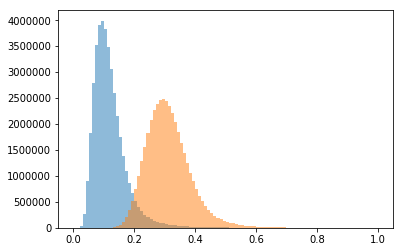

In [369]:
plt.hist(temporal_cos_dist, alpha=0.5, bins=100)
plt.hist(temporal_euclid_dist, alpha=0.5, bins=100)
plt.show()

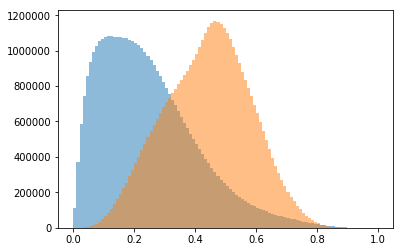

In [370]:
plt.hist(audio_cos_dist, alpha=0.5, bins=100)
plt.hist(audio_euclid_dist, alpha=0.5, bins=100)
plt.show()

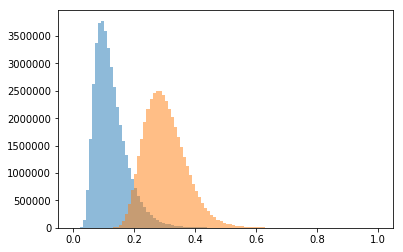

In [371]:
plt.hist(librosa_cos_dist, alpha=0.5, bins=100)
plt.hist(librosa_euclid_dist, alpha=0.5, bins=100)
plt.show()

In [698]:
temporal_coeff = 0.2
audio_coeff = 0.2
librosa_coeff = 0.6

In [699]:
# linear combination of cosine distances
distances = temporal_coeff*temporal_cos_dist + audio_coeff*audio_cos_dist + librosa_coeff*librosa_cos_dist

In [481]:
# linear combination of euclidean distances
distances = temporal_coeff*temporal_euclid_dist + audio_coeff*audio_euclid_dist + librosa_coeff*librosa_euclid_dist

## 3. Creating the graph

We use the opposite of distances as weights, as it measures the strength of the edges.

In [700]:
weights = 1 - distances

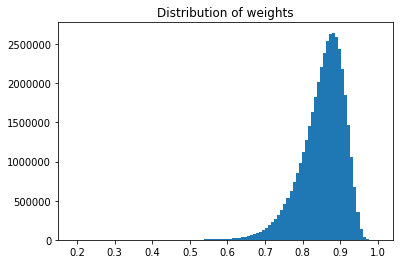

In [701]:
plt.hist(weights, bins=100)
plt.title('Distribution of weights')
plt.show()

In [702]:
# use threshold to only connect close tracks and also select a realistic number of edges
adjacency = squareform(weights)
threshold = 0.954
adjacency[adjacency < threshold] = 0

In [703]:
print("Number of edges :", (adjacency!=0).sum())

Number of edges : 235370


We create the graph using networkx and extract the giant component to get a connected graph.

In [704]:
G = nx.from_numpy_array(adjacency)

In [705]:
n_nodes = G.number_of_nodes()

In [706]:
GC = max(nx.connected_component_subgraphs(G), key=len)

In [707]:
GC.number_of_nodes()

6365

In [708]:
gc_nodes = np.asarray(GC.nodes)

In [709]:
# we add a distance attribute to each edge, basically just the reverse of what we did in the first cell of part 3
nx.set_edge_attributes(GC, name="distance", values={ k:(1-v) for (k,v) in nx.get_edge_attributes(GC, "weight").items() })

In [710]:
laplacian = nx.normalized_laplacian_matrix(GC)

In [711]:
eigvals, U = scipy.linalg.eigh(laplacian.todense()) # we will need these for the signal processing later

In [712]:
coords_gc = nx.spring_layout(GC) # this layout yielded the best results in terms of visualization

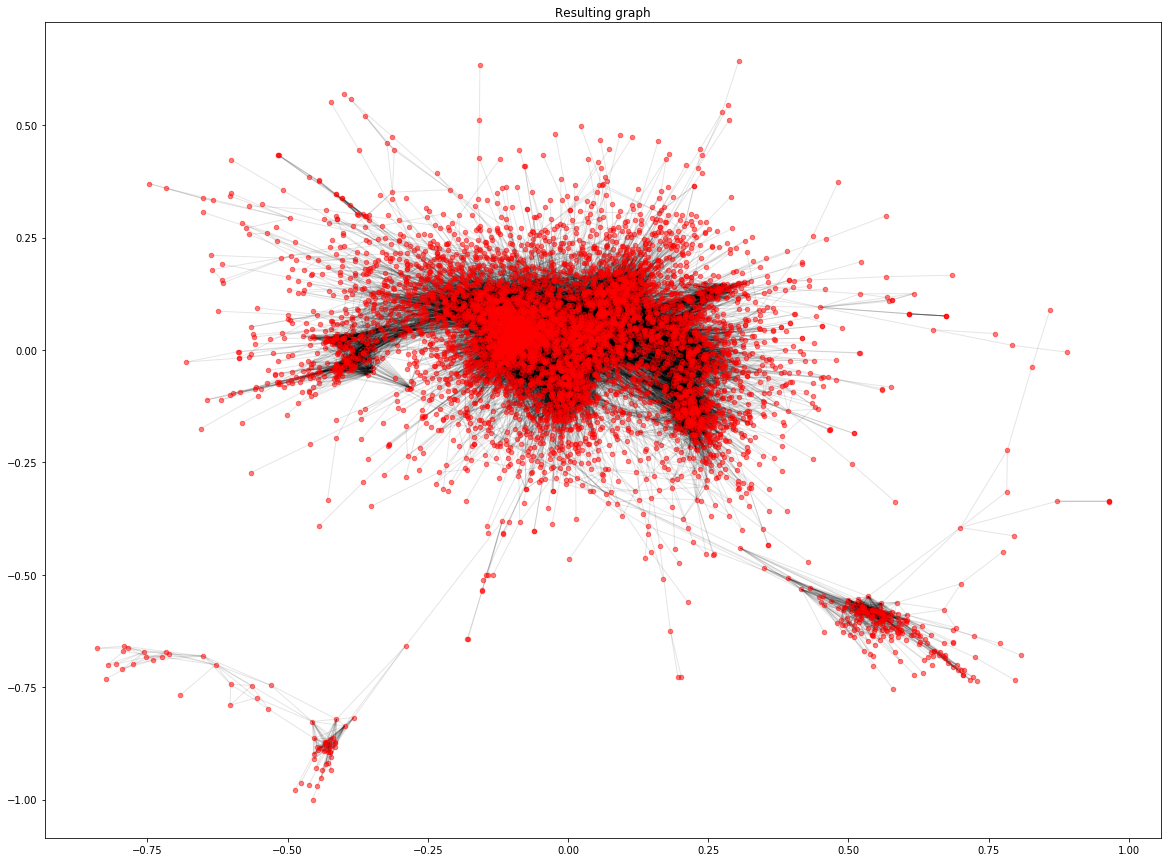

In [713]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(GC, coords_gc, node_size=20, alpha=0.5)
nx.draw_networkx_edges(GC, coords_gc, alpha=0.1)
plt.title("Resulting graph")
plt.show()

We plot our graph nodes with one color per genre to get a first feeling of its quality.

In [714]:
sub_tracks = tracks.loc[sub_echonest.index]
gc_tracks = sub_tracks.iloc[gc_nodes]

In [715]:
genre_labels = gc_tracks.track.genre_top

In [716]:
# genres repartition in our graph
genre_labels.value_counts()

Rock                   3200
Electronic             1106
Hip-Hop                 652
Folk                    490
Old-Time / Historic     286
Pop                     253
Classical               194
Jazz                    184
Name: genre_top, dtype: int64

In [717]:
numeric_labels = genre_labels.astype('category').cat.codes

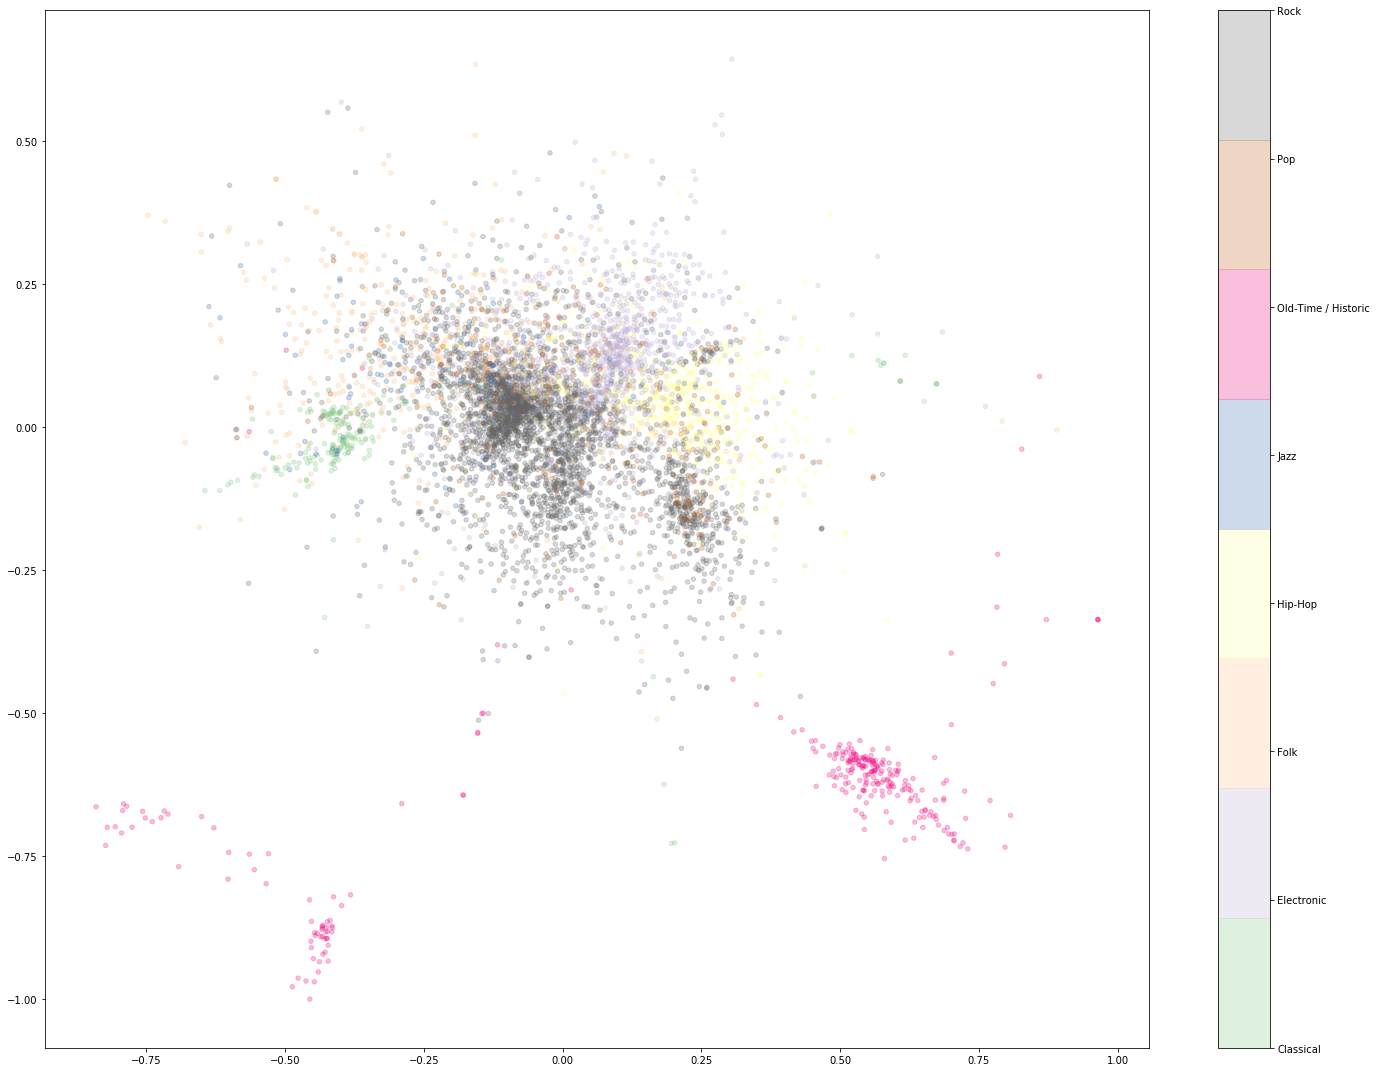

In [839]:
plt.figure(figsize=(20,15))
nodes = nx.draw_networkx_nodes(GC, coords_gc, node_size=20, node_color=numeric_labels, alpha=0.25, cmap='Accent')
cbar = plt.colorbar(nodes)
cbar.ax.set_yticklabels(genre_labels.astype('category').cat.categories)
#plt.title("Genre repartition of the graph based only on echonest audio features using a spring layout, clustering coefficient ={:.5f}".format(nx.average_clustering(GC)))
plt.tight_layout()
filename = "cos/linear_combination_2.png"
plt.savefig("results/fig/"+filename)
plt.show()

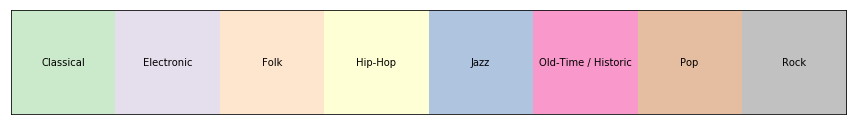

In [692]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(np.arange(8).reshape(1,8), cmap='Accent', alpha=0.4)
plt.xticks([])
plt.yticks([])
for i in range(8):
    text = ax.text(i, 0, genre_labels.astype('category').cat.categories[i], ha="center", va="center", color="k")
plt.tight_layout()
plt.savefig("results/fig/genres_legend.png")
plt.show()

Now we compute the clustering coefficient and our genre distinction coefficient :

In [719]:
clustering_coeff = nx.average_clustering(GC)
clustering_coeff

0.39613878331525787

In [720]:
genres_indices = gc_tracks.track.groupby('genre_top').indices

In [721]:
mean_dist_intra_genre = []
mean_dist_extra_genre = []
for genre in genres_indices:
    subgraph_edges = GC.subgraph(gc_nodes[genres_indices[genre]]).edges.data('distance')
    mean_dist_intra_genre.append(np.mean([e[2] for e in subgraph_edges]))
    
    extra_edges = set(GC.edges(gc_nodes[genres_indices[genre]])) - set(GC.subgraph(gc_nodes[genres_indices[genre]]).edges)
    mean_dist_extra_genre.append(np.mean([GC.edges[e]['distance'] for e in extra_edges]))

In [722]:
genre_distinction_coeff = np.divide(mean_dist_extra_genre, mean_dist_intra_genre).sum()
genre_distinction_coeff

8.410262137318941

In [697]:
with open('results/log.csv','a') as f:
    writer = csv.writer(f)
    #writer.writerow(['filename', 'audio_coeff', 'temporal_coeff', 'librosa_coeff', 'threshold', 'clustering_coeff', 'genre_distinction_coeff'])
    writer.writerow([filename, audio_coeff, temporal_coeff, librosa_coeff, threshold, clustering_coeff, genre_distinction_coeff])

From our results in the log.csv file, we choose the cosine distance with coefficients 0.2, 0.2, 0.6.

## 4. Computing the shortest and smoothest path

For both, we use Dijkstra algorithm, but the shortest minimizes the distance and the smoothness minimizes the overall cost of edges, which is the sum of the distance and the difference in the signal value between the two nodes linked by the edge.

In [723]:
dict_gc = dict(zip(gc_nodes,range(len(gc_nodes))))

In [724]:
def smoothness(sig, i, j):
    return np.abs(sig[dict_gc[i]] - sig[dict_gc[j]])

In [725]:
smooth_mean = []
shortest_mean = []
n_trials = 500

for i in tqdm_notebook(range(n_trials)):
    # random source and target tracks
    s,t = np.random.choice(gc_nodes, size=2)
    
    # put a dirac impulse at both tracks
    dirac = np.zeros(len(gc_nodes))
    dirac[[dict_gc[s],dict_gc[t]]] = 1
    
    # diffuse it using a heat filter
    tau = 15
    signal = U @ ( np.exp(-tau*eigvals) * (U.T @ dirac) )
    signal = normalized(signal)
    
    # add cost value to each edge according to the formula
    # cost = distance + variation in signal
    nx.set_edge_attributes(GC, name="cost", values={ k:v+smoothness(signal, k[0],k[1]) for (k,v) in nx.get_edge_attributes(GC, "distance").items() })
    
    # compute both playlist : the "smooth" one minimizes the cost, the "short" one the distance.
    smooth_playlist = nx.dijkstra_path(GC, s, t, weight='cost')
    shortest_playlist = nx.dijkstra_path(GC, s, t, weight='distance')
    
    # store mean cost of all edges in each path
    smooth_mean.append(np.mean([ GC.edges[e]['cost'] for e in list(zip(smooth_playlist[:-1],smooth_playlist[1:])) ]))
    shortest_mean.append(np.mean([ GC.edges[e]['cost'] for e in list(zip(shortest_playlist[:-1],shortest_playlist[1:])) ]))

In [726]:
print("Average cost of shortest path :", np.mean(shortest_mean))
print("Average cost of smoothest path :", np.mean(smooth_mean))

Average cost of shortest path : 0.28120149138045203
Average cost of smoothest path : 0.17500356757674326


Our "smooth path" might find a longer path but it is always smoother than the shortest one, as it has less variation in signal.

## 5. Playlist example

In [727]:
# all artists in our graph
[ artist for artist in gc_tracks.artist.name.unique() ]

['AWOL',
 'Kurt Vile',
 'Alec K. Redfearn & the Eyesores',
 'Amoebic Ensemble',
 'Arc and Sender',
 'Argumentix',
 'Ed Askew',
 'Bad News Bats',
 'Barnacled',
 'Bird Names',
 'Black Elk',
 'Blah Blah Blah',
 'Blanketship',
 'Borful Tang',
 'Celesteville',
 'Chandeliers',
 'Charles Manson',
 'Chief Boima',
 'Cinwaves',
 'Clockcleaner',
 'CoCoComa',
 "DJ's of Mass Destruction",
 'Dora Bleu',
 'Double Dagger',
 'Dragging an Ox Through Water',
 'El Jesus De Magico',
 'Ethan Persoff',
 'Fanatic',
 'Flying Luttenbachers',
 'Food For Animals',
 'The Functional Blackouts',
 'Fursaxa',
 'Fuzz Unlimited',
 'Glove Compartment',
 'Guinea Worms',
 'Hall Of Fame',
 'Hecuba',
 'Here Comes A Big Black Cloud!!',
 'Heroin UK',
 'I Am the Liquor',
 'Illusion of Safety',
 'Impediments',
 'Jason Willett',
 'King Kong Ding Dong',
 'Kowloon Walled City',
 "Kyle Bruckmann's Wrack",
 'Lazy Magnet',
 'LO MOdA',
 'Lop',
 'Lovely Little Girls',
 'Lozenge',
 'Lungs Of A Giant',
 'Mahjongg',
 'Mary Halvorson and We

In [759]:
source_track, target_track = np.random.choice(gc_nodes, size=2)

In [760]:
sub_tracks[[('track', 'title'),('artist','name'),('track','genre_top')]].iloc[[source_track, target_track]]

,track,artist,track
,title,name,genre_top
track_id,,,
21735,Rule The World / Sirens,Manikin,Rock
23454,Electronic Mind,Tom Woxom,Electronic


In [761]:
dirac = np.zeros(len(gc_nodes))
dirac[[dict_gc[source_track],dict_gc[target_track]]] = 1

In [866]:
t = 15
signal = U @ ( np.exp(-t*eigvals) * (U.T @ dirac) )

In [867]:
signal = normalized(signal)

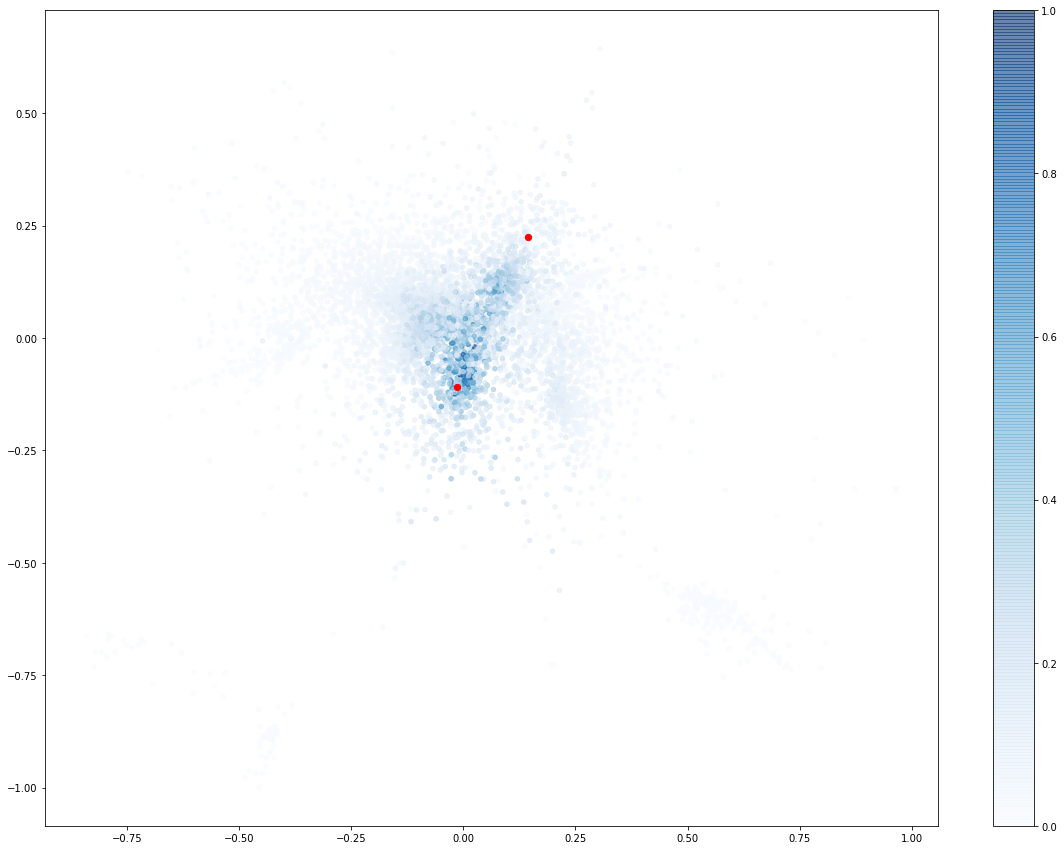

In [870]:
plt.figure(figsize=(20,15))
nodes = nx.draw_networkx_nodes(GC, coords_gc, node_size=20, node_color=signal, alpha=0.6, cmap="Blues")
nx.draw_networkx_nodes(GC, coords_gc, node_size=40, nodelist=[source_track, target_track], color='r')
plt.colorbar(nodes)
plt.savefig("results/fig/heat_signal.png")
plt.show()

In [783]:
nx.set_edge_attributes(GC, name="cost", values={ k:v+smoothness(signal, k[0],k[1]) for (k,v) in nx.get_edge_attributes(GC, "distance").items() })

In [787]:
smooth_playlist = nx.dijkstra_path(GC, source_track, target_track, weight='cost')
shortest_playlist = nx.dijkstra_path(GC, source_track, target_track, weight='distance')

In [788]:
sub_tracks[[('track', 'title'),('artist','name'),('track','genre_top')]].iloc[smooth_playlist]

,track,artist,track
,title,name,genre_top
track_id,,,
21735,Rule The World / Sirens,Manikin,Rock
10829,Night Brigade,Golden Triangle,Rock
21523,Barney Rubble,The Axemen,Rock
14418,Things,Sigmund Droid,Rock
33600,Sekssnee,New Found Land,Electronic
23451,Paula And Sid,Tom Woxom,Electronic
23454,Electronic Mind,Tom Woxom,Electronic


In [789]:
sub_tracks[[('track', 'title'),('artist','name'),('track','genre_top')]].iloc[shortest_playlist]

,track,artist,track
,title,name,genre_top
track_id,,,
21735,Rule The World / Sirens,Manikin,Rock
9994,Sally Is A Girl,50 Foot Wave,Rock
32514,New Ferves,Smurd,Electronic
12078,Bazerkle basement,Vernon Lenoir,Electronic
23454,Electronic Mind,Tom Woxom,Electronic


In [792]:
smooth_labels = {}
for song in smooth_playlist:
    smooth_labels[song] = sub_tracks.iloc[song].artist['name']

short_labels = {}
for song in shortest_playlist:
    short_labels[song] = sub_tracks.iloc[song].artist['name']

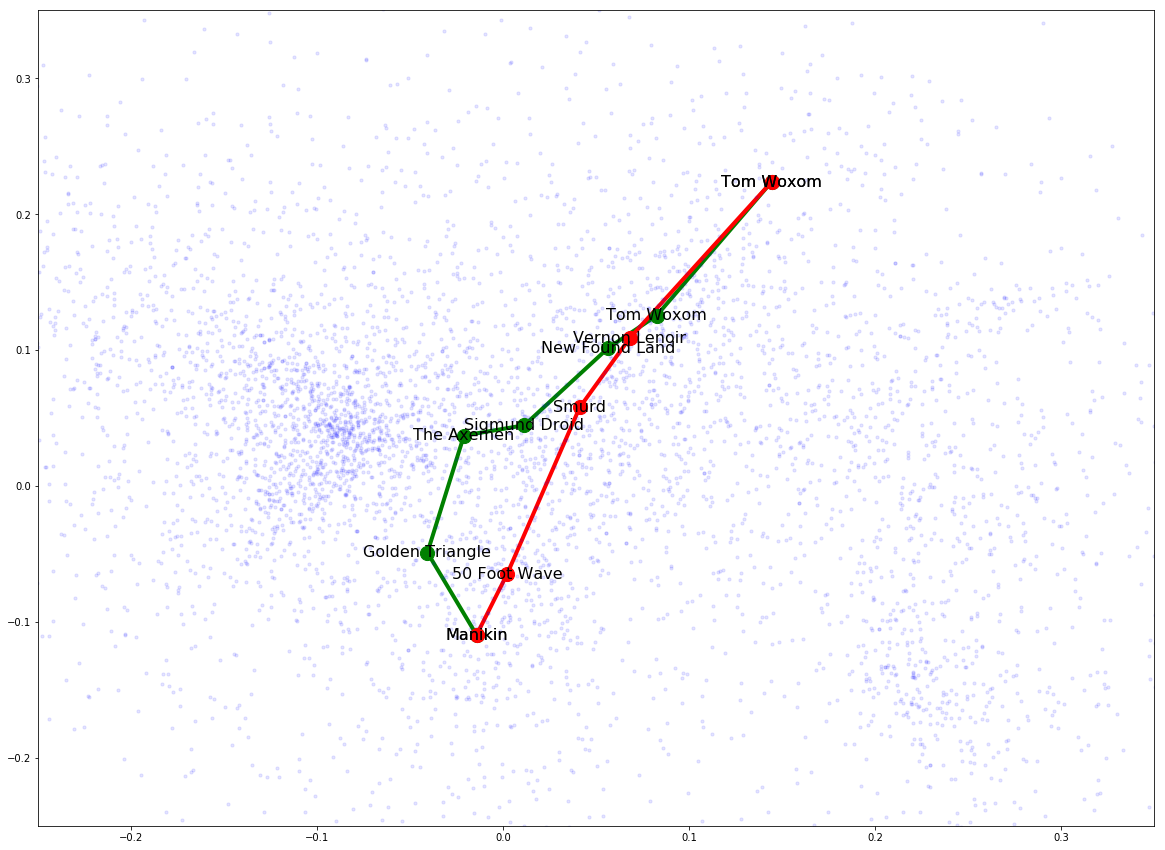

In [869]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(GC, coords_gc, node_size=10, node_color='b', alpha=0.1)
nx.draw_networkx_nodes(GC, coords_gc, nodelist=smooth_playlist, node_size=200, node_color='g')
nx.draw_networkx_nodes(GC, coords_gc, nodelist=shortest_playlist, node_size=200, node_color='r')
nx.draw_networkx_edges(GC, coords_gc, edgelist=list(zip(smooth_playlist[:-1],smooth_playlist[1:])), edge_color='g', width=4)
nx.draw_networkx_edges(GC, coords_gc, edgelist=list(zip(shortest_playlist[:-1],shortest_playlist[1:])), edge_color='r', width=4)
nx.draw_networkx_labels(GC, coords_gc, short_labels, font_size=16)
nx.draw_networkx_labels(GC, coords_gc, smooth_labels, font_size=16)
plt.xlim([-0.25,0.35])
plt.ylim([-0.25,0.35])
plt.savefig("results/fig/playlist.png")
plt.show()

## 6. Artist repartition example

In [821]:
def gc_to_g(nodelist):
    return [ gc_nodes[n] for n in nodelist ]

In [822]:
bjm = list(np.argwhere(gc_tracks.artist.name == 'Brian Jonestown Massacre').flatten())
pq = list(np.argwhere(gc_tracks.artist.name == 'Parquet Courts').flatten())

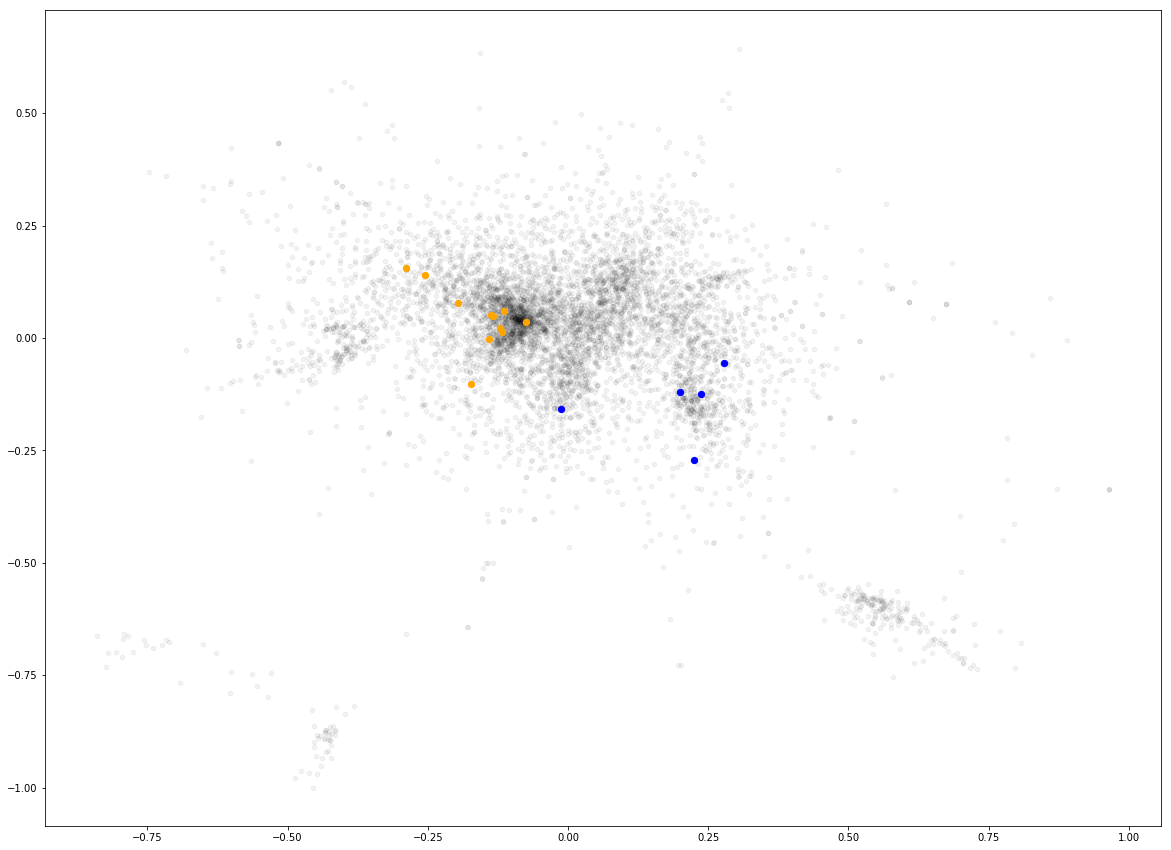

In [837]:
plt.figure(figsize=(20,15))
nx.draw_networkx_nodes(GC, coords_gc, node_size=20, node_color='k', alpha=0.05)
nx.draw_networkx_nodes(GC, coords_gc, nodelist=gc_to_g(bjm), node_size=40, node_color='orange')
nx.draw_networkx_nodes(GC, coords_gc, nodelist=gc_to_g(pq), node_size=40, node_color='b')
#nx.draw_networkx_edges(GC, coords_gc, alpha=0.2)
plt.show()